In [ ]:
!git clone https://github.com/digitalepidemiologylab/plantvillage_deeplearning_paper_dataset.git

Cloning into 'plantvillage_deeplearning_paper_dataset'...
remote: Enumerating objects: 163224, done.
^C


In [ ]:
import os
import torch
from PIL import Image
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from PIL import Image
from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt


directory = '/content/plantvillage_deeplearning_paper_dataset/raw/color'
healthy_dir = []
unhealthy_dir = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    #if os.path.isfile(f):
    #if 'Apple' in str(f):
    if 'healthy' in str(f):
      healthy_dir.append(f)
    else:
        unhealthy_dir.append(f)
print(healthy_dir)
print(unhealthy_dir)
#transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((224))])
healthy = []
unhealthy = []
val_health = []
val_uhealth = []
for dir in healthy_dir:
  if 'Corn' not in str(dir):
    for filename in os.listdir(dir):
      f = os.path.join(dir, filename)
      #healthy.append(torch.Tensor.float(transform(Image.open(f)))[:3])
      healthy.append(f)
  else:
    for filename in os.listdir(dir):
      f = os.path.join(dir, filename)
      #apple_health.append(torch.Tensor.float(transform(Image.open(f)))[:3])
      val_health.append(f)
for dir in unhealthy_dir:
  if 'Corn' not in str(dir):
    for filename in os.listdir(dir):
      f = os.path.join(dir, filename)
      #unhealthy.append(torch.Tensor.float(transform(Image.open(f)))[:3])
      unhealthy.append(f)
  else:
    for filename in os.listdir(dir):
      f = os.path.join(dir, filename)
      #val_uhealth.append(torch.Tensor.float(transform(Image.open(f)))[:3])
      val_uhealth.append(f)
print(len(healthy))
#print(healthy[0].shape)
print(len(unhealthy))
#print(unhealthy[0].shape)
# dataset = healthy + unhealthy
# labels = [1 for i in range(len(healthy))] + [0 for i in range(len(unhealthy))]

ValueError: ignored

In [ ]:
from torch.utils.data import Dataset
class CustomImageDataset(Dataset):
    def __init__(self, labels, images, transform=None, target_transform=None):
        self.img_labels = labels
        self.imgs = images
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = torch.Tensor.float(transform(transforms.ToTensor()(Image.open(self.imgs[idx]))[:3]))
        label = self.img_labels[idx]
        # if self.transform:
        #     image = self.transform(image)
        # if self.target_transform:
        #     label = self.target_transform(label)
        return image, label

In [ ]:
import random
def split(dataset, r = 0.8):
  k = int(r*len(dataset))
  train_idx = random.sample(list(range(len(dataset))), k = k)
  test_idx = [i for i in range(len(dataset)) if i not in train_idx]
  train_data = [dataset[i] for i in train_idx]
  test_data = [dataset[i] for i in test_idx]
  return train_data, test_data


In [ ]:
h_train, h_test = split(healthy)
u_train, u_test = split(unhealthy)
train = h_train + u_train
tr_labels = [1 for i in range(len(h_train))] + [0 for i in range(len(u_train))]
test = h_test + u_test
t_labels = [1 for i in range(len(h_test))] + [0 for i in range(len(u_test))]
print(len(train), len(test))
transform = transforms.Compose([transforms.Resize((224)),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)]) 
test_transform = transforms.Compose([transforms.Resize((224)),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) 
train_set = CustomImageDataset(tr_labels, train, transform = transform)
test_set = CustomImageDataset(t_labels, test, transform = test_transform)

In [ ]:
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[ 0.7129,  0.7727,  0.7013,  ...,  0.4158,  0.4000,  0.3946],
         [ 0.8427,  0.7380,  0.6920,  ...,  0.4092,  0.3627,  0.3324],
         [ 0.6364,  0.5289,  0.6278,  ...,  0.4327,  0.3980,  0.3635],
         ...,
         [-0.2547, -0.5021, -0.4892,  ..., -0.3935, -0.6008, -0.4430],
         [-0.4379, -0.5000, -0.5004,  ..., -0.5798, -0.5126, -0.6980],
         [-0.5160, -0.4538, -0.4971,  ..., -0.6921, -0.7535, -0.6360]],

        [[ 0.8233,  0.8844,  0.8114,  ...,  0.5195,  0.5033,  0.4979],
         [ 0.9559,  0.8489,  0.8018,  ...,  0.5128,  0.4653,  0.4343],
         [ 0.7450,  0.6352,  0.7363,  ...,  0.5368,  0.5014,  0.4661],
         ...,
         [-0.2360, -0.4889, -0.4757,  ..., -0.3778, -0.5898, -0.4285],
         [-0.4233, -0.4867, -0.4871,  ..., -0.5683, -0.4997, -0.6892],
         [-0.5031, -0.4395, -0.4838,  ..., -0.6831, -0.7459, -0.6258]],

        [[ 1.2859,  1.3467,  1.2740,  ...,  1.1054,  1.0893,  1.0839],
         [ 1.4179,  1.3114,  1.2645,  ...,  1

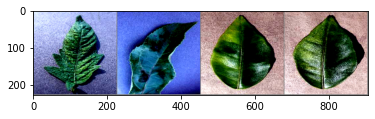

In [ ]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                         shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=True, num_workers=2)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images[0])
imshow(torchvision.utils.make_grid(images))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ft = models.vgg16(pretrained=True).to(device)
#num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
#model_ft.fc = nn.Linear(num_ftrs, 2)
#model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs

In [ ]:
losses = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer_ft.zero_grad()

        # forward + backward + optimize
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_ft.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    losses.append(running_loss)
    PATH = f'base_color_transform_nocorn_epoch:{epoch}.pth'
    torch.save(model_ft.state_dict(), PATH)

print('Finished Training')

[1,  2000] loss: 0.261
[1,  4000] loss: 0.060
[1,  6000] loss: 0.061
[1,  8000] loss: 0.041
[1, 10000] loss: 0.028
[2,  2000] loss: 0.024
[2,  4000] loss: 0.020
[2,  6000] loss: 0.016
[2,  8000] loss: 0.017
[2, 10000] loss: 0.009
Finished Training


In [ ]:
# epoch = 2
# PATH = f'base_color_transform_nocorn_epoch:{epoch}.pth'
# print(PATH)
# #torch.save(net.state_dict(), PATH)

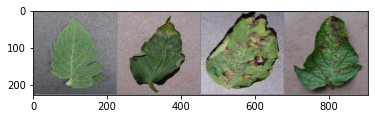

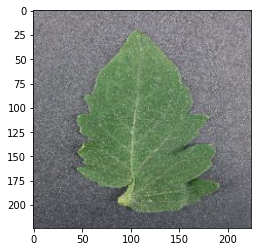

tensor([[[ 0.0950, -0.0442,  0.2243,  ...,  0.0349,  0.1459,  0.0923],
         [ 0.2882,  0.2741,  0.1616,  ...,  0.2385, -0.0361, -0.1622],
         [ 0.1070,  0.0457,  0.1334,  ..., -0.0540,  0.0235,  0.0848],
         ...,
         [-0.1989, -0.3210, -0.4387,  ..., -0.2439, -0.2608, -0.2579],
         [-0.5586, -0.3534, -0.3051,  ..., -0.2786, -0.2533, -0.2427],
         [-0.3867, -0.3997, -0.4107,  ..., -0.3028, -0.3315, -0.2475]],

        [[ 0.0793, -0.0599,  0.2086,  ...,  0.0192,  0.1302,  0.0766],
         [ 0.2725,  0.2584,  0.1459,  ...,  0.2228, -0.0518, -0.1779],
         [ 0.0914,  0.0300,  0.1177,  ..., -0.0697,  0.0078,  0.0691],
         ...,
         [-0.1911, -0.3132, -0.4309,  ..., -0.2203, -0.2373, -0.2343],
         [-0.5507, -0.3455, -0.2972,  ..., -0.2551, -0.2297, -0.2192],
         [-0.3789, -0.3919, -0.4029,  ..., -0.2793, -0.3079, -0.2240]],

        [[ 0.1185, -0.0206,  0.2478,  ...,  0.0584,  0.1694,  0.1158],
         [ 0.3117,  0.2976,  0.1852,  ...,  0

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
imshow(images[0])
print(images[0])

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = model_ft.to('cpu')(images)

In [ ]:
print(labels)

tensor([1, 0, 0, 0])


In [ ]:
_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([1, 0, 0, 0])


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model_ft(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

KeyboardInterrupt: ignored

In [ ]:
print(f'Train Accuracy of the network: {100 * correct // total} %')

Train Accuracy of the network: 98 %


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = model_ft.to(device)(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


In [ ]:
print(f'Test Accuracy of the network: {100 * correct // total} %')

Test Accuracy of the network: 99 %


In [ ]:
val = val_health + val_uhealth
v_labels = [1 for i in range(len(val_health))] + [0 for i in range(len(val_uhealth))]

In [ ]:
val_set = CustomImageDataset(v_labels, val, transform = test_transform)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

In [ ]:
correct = 0
total = 0
model_ft.to(device)
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = model_ft(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [ ]:
print(f'Test Accuracy of the network: {100 * correct // total} %')


Test Accuracy of the network: 77 %
